# Predicting Used Car Prices on Craigslist


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import the dataset from Kaggle
vehicle_uncleaned = pd.read_csv('/content/drive/MyDrive/freshman/1 sem/databootcamp/vehicles.csv')

In [ ]:
vehicle_uncleaned.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
vehicle_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

## Cleaning the Data

In [ ]:
#remove irrelavent columns, or columns with many null values
vehicle_uncleaned.drop(['id','url','region','region_url','VIN','size','image_url','description','county', 'state', 'lat', 'long', 'posting_date'], axis=1, inplace=True)
vehicle_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


In [ ]:
vehicle_uncleaned.isna().sum()

,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400
title_status,8242
transmission,2556


In [ ]:
#remove null values and fill remaining with "unknown"
vehicle_uncleaned.dropna(subset=['year','model','fuel','odometer','title_status','transmission'], inplace=True)
vehicle_uncleaned.fillna('unknown', inplace=True)

In [ ]:
#remove duplicates
vehicle_uncleaned.drop_duplicates(inplace=True)

In [ ]:
vehicle_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235633 entries, 27 to 426873
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         235633 non-null  int64  
 1   year          235633 non-null  float64
 2   manufacturer  235633 non-null  object 
 3   model         235633 non-null  object 
 4   condition     235633 non-null  object 
 5   cylinders     235633 non-null  object 
 6   fuel          235633 non-null  object 
 7   odometer      235633 non-null  float64
 8   title_status  235633 non-null  object 
 9   transmission  235633 non-null  object 
 10  drive         235633 non-null  object 
 11  type          235633 non-null  object 
 12  paint_color   235633 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 25.2+ MB


In [ ]:
for i in vehicle_uncleaned.columns:
  print(i, len(vehicle_uncleaned[i].value_counts().index))

price 14856
year 113
manufacturer 42
model 27513
condition 7
cylinders 9
fuel 5
odometer 101872
title_status 6
transmission 3
drive 4
type 14
paint_color 13


In [ ]:
#remove outliers in the year
vehicle_uncleaned.drop(vehicle_uncleaned[vehicle_uncleaned['year'] < 1999].index, inplace=True)
vehicle_uncleaned['price'] = vehicle_uncleaned['price'].astype(int)
vehicle_uncleaned['odometer'] = vehicle_uncleaned['odometer'].astype(int)

In [ ]:
# keep the models for the top 50 most prevalent, encode the rest as "others"
model_list=vehicle_uncleaned['model'].value_counts().head(50).index
vehicle_uncleaned['model'] = vehicle_uncleaned['model'].apply(lambda x: x if str(x) in model_list else 'others')

In [ ]:
# keep the manufactures for the top 20 most prevalent, encode the rest as "others"
manufacturer_list = vehicle_uncleaned['manufacturer'].value_counts().head(20).index
vehicle_uncleaned['manufacturer'] = vehicle_uncleaned['manufacturer'].apply(lambda x: x if str(x) in manufacturer_list else 'others')

In [ ]:
vehicle_uncleaned['model'].value_counts()

,count
model,
others,156151
f-150,4196
silverado 1500,2688
1500,2258
camry,2118
accord,2051
civic,1930
altima,1773
escape,1729


In [ ]:
vehicle_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217726 entries, 27 to 426873
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         217726 non-null  int64  
 1   year          217726 non-null  float64
 2   manufacturer  217726 non-null  object 
 3   model         217726 non-null  object 
 4   condition     217726 non-null  object 
 5   cylinders     217726 non-null  object 
 6   fuel          217726 non-null  object 
 7   odometer      217726 non-null  int64  
 8   title_status  217726 non-null  object 
 9   transmission  217726 non-null  object 
 10  drive         217726 non-null  object 
 11  type          217726 non-null  object 
 12  paint_color   217726 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 23.3+ MB


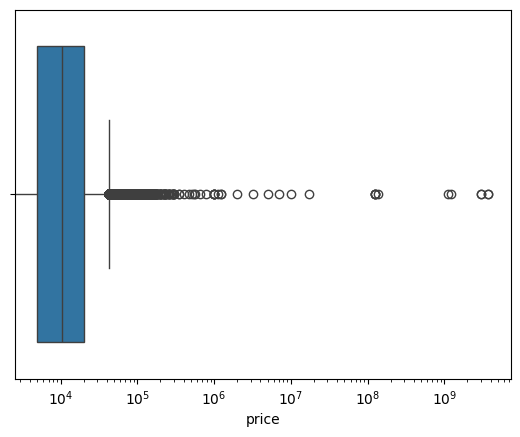

In [ ]:
#remove outliers in price
sns.boxplot(data = vehicle_uncleaned, x='price')
plt.xscale('log')

In [ ]:
price_iqr = vehicle_uncleaned['price'].quantile(0.75) - vehicle_uncleaned['price'].quantile(0.25)
price_lower_bound = vehicle_uncleaned['price'].quantile(0.1)
price_upper_bound = vehicle_uncleaned['price'].quantile(0.75) + (1.5 * price_iqr)
vehicle_uncleaned = vehicle_uncleaned[(vehicle_uncleaned['price'] >= price_lower_bound) & (vehicle_uncleaned['price'] <= price_upper_bound)]

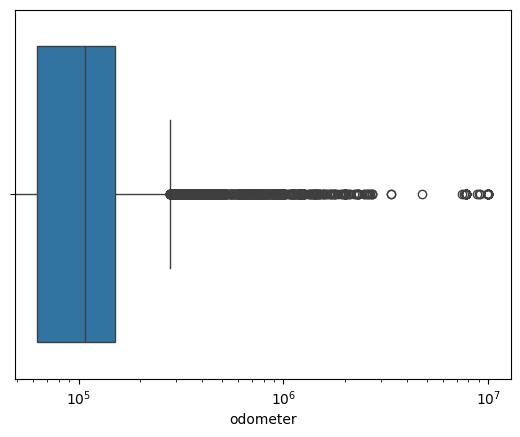

In [ ]:
# remove outliers in "odometer"
sns.boxplot(data = vehicle_uncleaned, x='odometer')
plt.xscale('log')

In [ ]:
odometer_iqr = vehicle_uncleaned['odometer'].quantile(0.75) - vehicle_uncleaned['odometer'].quantile(0.25)
odometer_lower_bound = vehicle_uncleaned['odometer'].quantile(0.05)
odometer_upper_bound = vehicle_uncleaned['odometer'].quantile(0.75) + (1.5 * odometer_iqr)
vehicle_uncleaned = vehicle_uncleaned[(vehicle_uncleaned['odometer'] >= odometer_lower_bound) & (vehicle_uncleaned['odometer'] <= odometer_upper_bound)]

In [ ]:
car = vehicle_uncleaned.reset_index(drop=True)

In [ ]:
car.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,33590,2014.0,gmc,others,good,8 cylinders,gas,57923,clean,other,unknown,pickup,white
1,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,unknown,pickup,blue
2,39590,2020.0,chevrolet,others,good,8 cylinders,gas,19160,clean,other,unknown,pickup,red
3,30990,2017.0,toyota,others,good,8 cylinders,gas,41124,clean,other,unknown,pickup,red
4,15000,2013.0,ford,others,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174512 entries, 0 to 174511
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         174512 non-null  int64  
 1   year          174512 non-null  float64
 2   manufacturer  174512 non-null  object 
 3   model         174512 non-null  object 
 4   condition     174512 non-null  object 
 5   cylinders     174512 non-null  object 
 6   fuel          174512 non-null  object 
 7   odometer      174512 non-null  int64  
 8   title_status  174512 non-null  object 
 9   transmission  174512 non-null  object 
 10  drive         174512 non-null  object 
 11  type          174512 non-null  object 
 12  paint_color   174512 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 17.3+ MB


## EDA

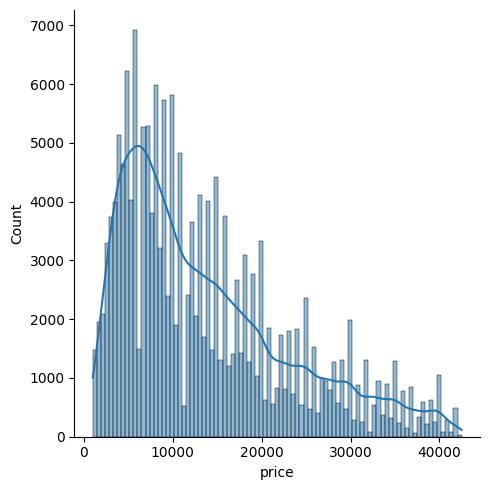

In [ ]:
# look at the price distribution
sns.displot(data=car, x='price', kde=True)

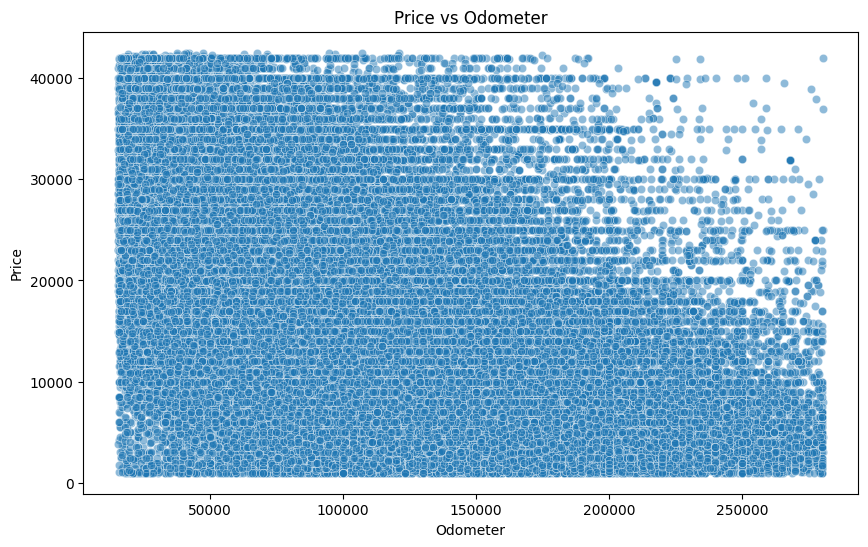

In [ ]:
# plot correlation between price and odometer
sns.scatterplot(x='odometer', y='price', data=car, alpha=0.5)
plt.title('Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

In [ ]:
car['condition'].value_counts()

,count
condition,
unknown,64406
excellent,53588
good,40684
like new,11633
fair,3565
new,333
salvage,303


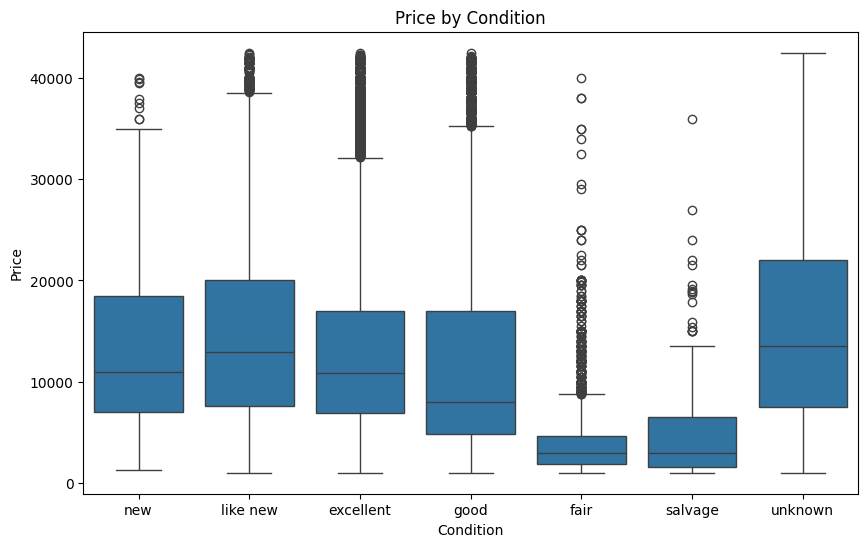

In [ ]:
# examine whether condition influences price
sns.boxplot(x='condition', y='price', data=car, order=['new', 'like new', 'excellent', 'good', 'fair', 'salvage', 'unknown'])
plt.title('Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()


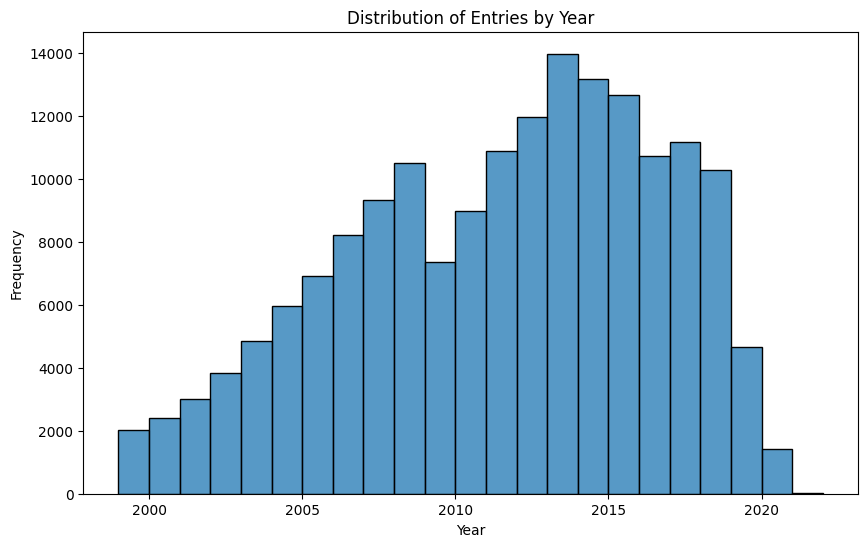

In [ ]:
# look at the counts of used car listings across time

sns.histplot(car['year'], kde=False, bins=23)
plt.title('Distribution of Entries by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

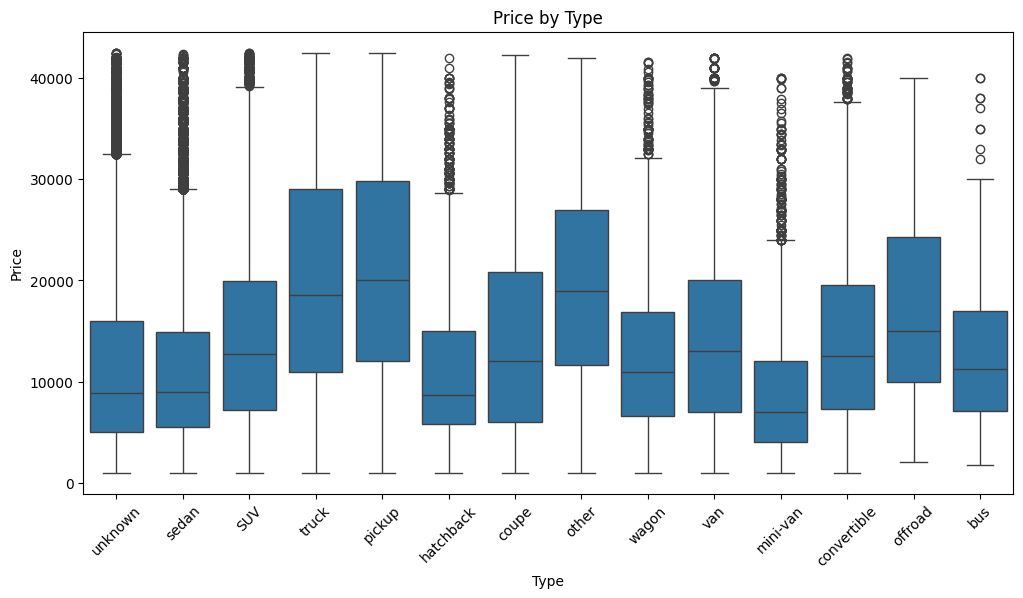

In [ ]:
# does the type of car correlate with price?
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='price', data=car, order=car['type'].value_counts().index)
plt.title('Price by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

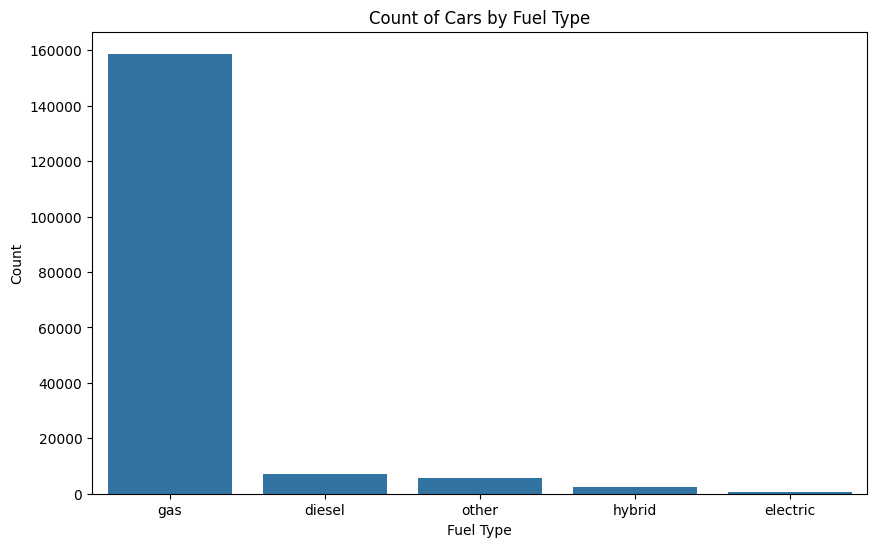

In [ ]:
# look at the distribution of fuel types
sns.countplot(x='fuel', data=car, order=car['fuel'].value_counts().index)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

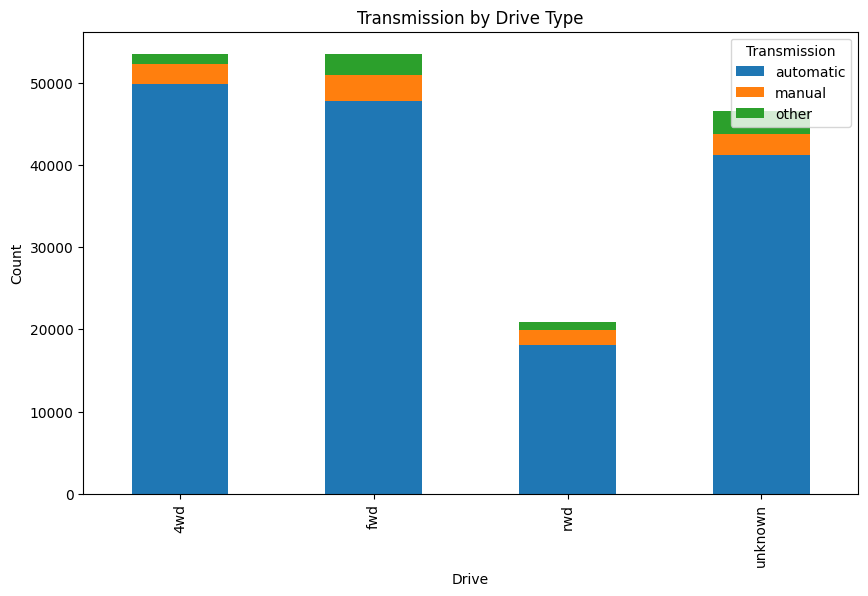

In [ ]:
transmission_drive = car.groupby(['drive', 'transmission']).size().unstack()
transmission_drive.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Transmission by Drive Type')
plt.xlabel('Drive')
plt.ylabel('Count')
plt.legend(title='Transmission')
plt.show()

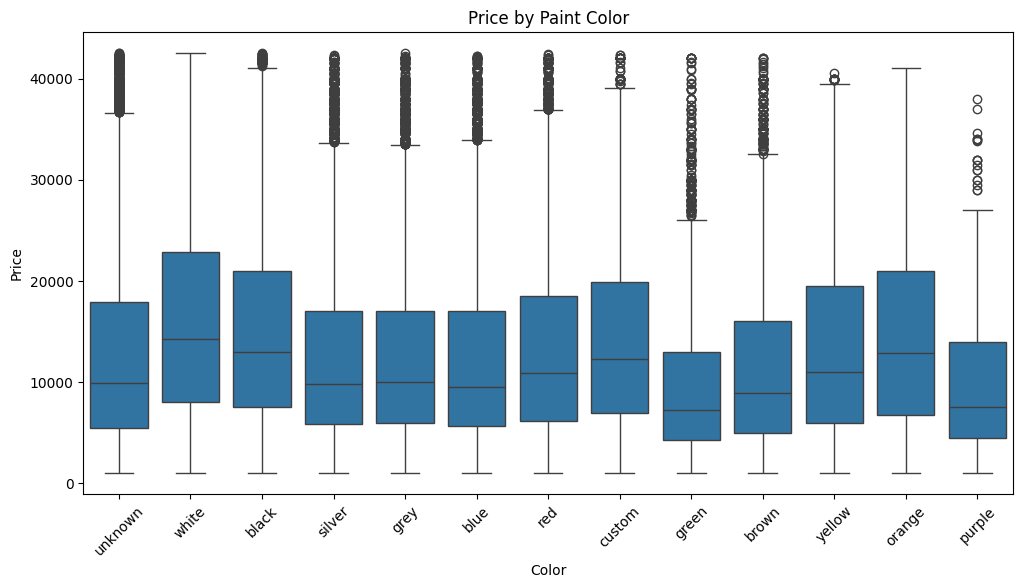

In [ ]:
# do prices vary across paint colors?
plt.figure(figsize=(12, 6))
sns.boxplot(x='paint_color', y='price', data=car, order=car['paint_color'].value_counts().index)
plt.title('Price by Paint Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

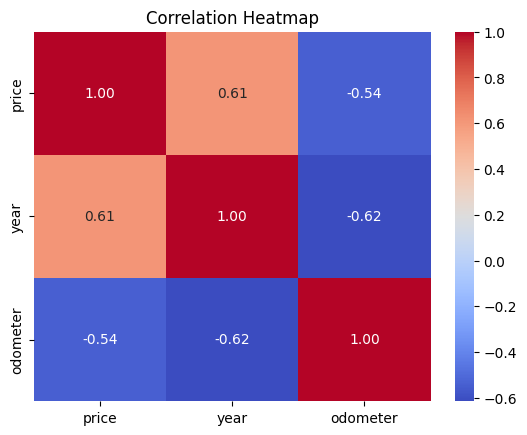

In [ ]:
#look at correlation between numerical columns
num_cols = car.select_dtypes(include=['float64', 'int64'])
# Plot the heatmap
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Prediction Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
# Establishing a baseline for comparison using the mean price
y = car['price']
baseline_preds = np.full(len(y),1)*y.mean()
print("mse: ", mean_squared_error(y, baseline_preds))
print("mae: ", mean_absolute_error(y, baseline_preds))
print("r-squared: ", r2_score(y, baseline_preds))

mse:  90066757.45556036
mae:  7687.265731186429
r-squared:  0.0


### Preprocessing

In [ ]:
car.dtypes

,0
price,int64
year,float64
manufacturer,object
model,object
condition,object
cylinders,object
fuel,object
odometer,int64
title_status,object
transmission,object


In [ ]:
num_cols = ['year', 'odometer']
cat_cols = ['manufacturer', 'model', 'cylinders', 'fuel', 'title_status', 'paint_color', 'type', 'transmission', 'drive']
ord = ['condition']
ord_cat = [['unknown', 'salvage', 'fair', 'good', 'excellent', 'like new', 'new']]
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')
ordinal_preprocessor = OrdinalEncoder(categories=ord_cat)
numerical_preprocessor = StandardScaler()


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, num_cols),
        ('cat', categorical_preprocessor, cat_cols),
        ('ord', ordinal_preprocessor, ord)
    ])

In [ ]:
X=car.drop(['price'], axis=1)
y=car['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .2) # use a 80-20 train test split

In [ ]:
sample_size = 30000  # Choose a smaller number of training samples
X_train_sample, y_train_sample = (
    X_train.sample(n=sample_size, random_state=42),
    y_train.loc[X_train.sample(n=sample_size, random_state=42).index]
)

In [ ]:
print(f"Sampled training set size: {X_train_sample.shape}")

Sampled training set size: (30000, 12)


In [ ]:
X_train_trans = preprocessor.fit_transform(X_train_sample) #encode both train and test set
X_test_trans = preprocessor.transform(X_test)

In [ ]:
all_models = pd.DataFrame(index=['R2 Score', 'Mean Absolute Error', 'Mean Squared Error', 'RMSE'])

#create a function to print the accuracy measures and also add them to the dataframe all_models to compare all the models at the end

def evaluate_model(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mse)
  print("mse: ", mse)
  print("rmse: ", rmse)
  print("mae: ", mae)
  print("r-squared: ", r2)
  return [r2, mae, mse, rmse]

## Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train_sample)
y_pred_lr = lr.predict(X_test_trans)

In [ ]:
lr_eval = evaluate_model(y_test, y_pred_lr)
all_models['Linear Regression'] = lr_eval

mse:  26498262.079389133
rmse:  5147.6462659539
mae:  3796.831164314219
r-squared:  0.707071175041796


## Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
lr_feat_names = preprocessor.get_feature_names_out()

In [ ]:
poly_feats = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_feats.fit_transform(X_train_trans)
X_test_poly = poly_feats.transform(X_test_trans)
poly_feat_names = poly_feats.get_feature_names_out(input_features=lr_feat_names)
print(poly_feat_names)

['num__year' 'num__odometer' 'cat__manufacturer_audi' ...
 'cat__drive_unknown^2' 'cat__drive_unknown ord__condition'
 'ord__condition^2']


In [ ]:
poly_lr = LinearRegression().fit(X_train_poly, y_train_sample)
y_pred_poly = poly_lr.predict(X_test_poly)

poly_eval = evaluate_model(y_test, y_pred_poly)
all_models['Polynomial Regression'] = poly_eval

mse:  20267588.223412246
rmse:  4501.953822887596
mae:  3071.319066615508
r-squared:  0.7759490495930008


In [ ]:
select_feats = SelectKBest(score_func=f_regression, k=15)v # select the top 15 features
X_train_selected = select_feats.fit_transform(X_train_poly, y_train_sample)
X_test_selected = select_feats.transform(X_test_poly)
top_feature_index = select_feats.get_support(indices=True)
poly_coef = poly_lr.coef_[top_feature_index]

# Retrieve the selected feature names
fifteen_feat_names = select_feats.get_feature_names_out(input_features=poly_feat_names)
fifteen_feat_names

array(['num__year', 'num__odometer', 'num__year cat__model_others',
       'num__year cat__cylinders_6 cylinders',
       'num__year cat__cylinders_unknown', 'num__year cat__fuel_gas',
       'num__year cat__title_status_clean',
       'num__year cat__transmission_automatic',
       'num__year cat__drive_4wd', 'num__year ord__condition',
       'num__odometer cat__model_others', 'num__odometer cat__fuel_gas',
       'num__odometer cat__title_status_clean',
       'num__odometer cat__transmission_automatic',
       'num__odometer ord__condition'], dtype=object)

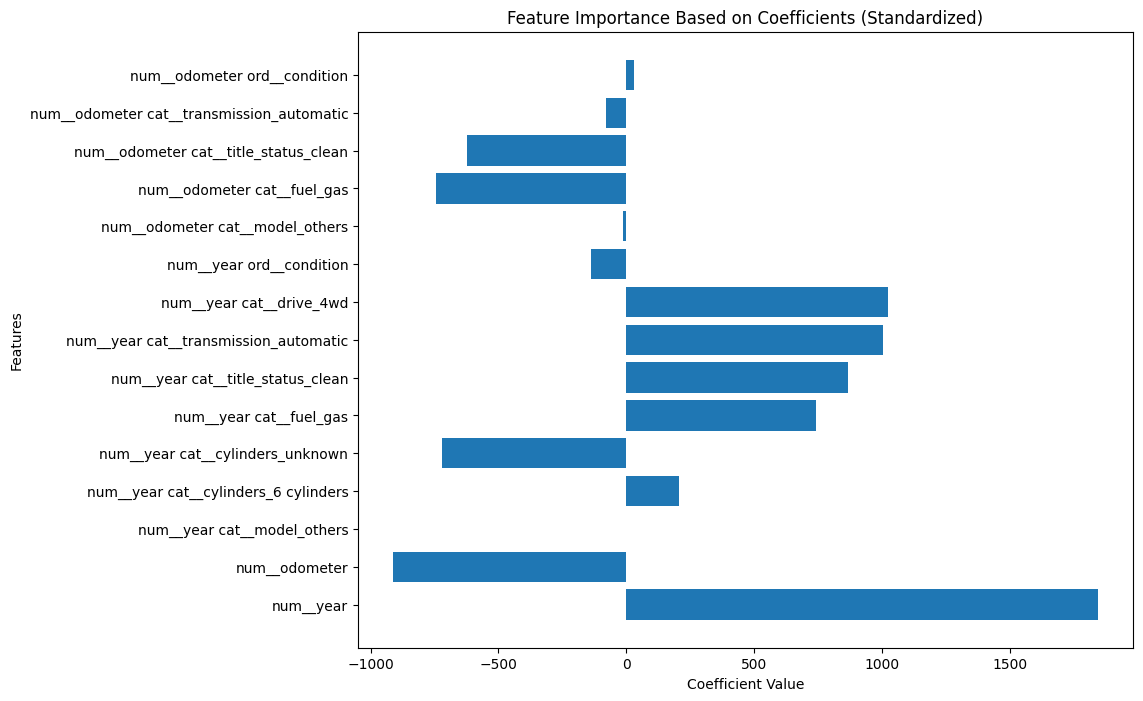

In [ ]:
poly_coef = poly_lr.coef_[top_feature_index]
coef_df = pd.DataFrame({'Feature': fifteen_feat_names, 'Coefficient': poly_coef})

# plot the coefficients
plt.figure(figsize=(10, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance Based on Coefficients (Standardized)")
plt.show()

## KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 21))}  # test k values between 1-20
knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_trans, y_train_sample)

print("Best parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Best parameters: {'n_neighbors': 15}
Best MSE: 22588802.818505336


In [ ]:
best_model = grid_search.best_estimator_ #evaluate based on the best parameter
y_pred_knn = best_model.predict(X_test_trans)
knn_eval = evaluate_model(y_test, y_pred_knn)
all_models['KNeighbors Regression'] = knn_eval

mse:  21991983.98359733
rmse:  4689.56117175129
mae:  3266.4782492431405
r-squared:  0.7568864702328689


## Decision Tree Regression

In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train_trans, y_train_sample)
y_pred_dt = decision_tree.predict(X_test_trans)

dt_eval = evaluate_model(y_test, y_pred_dt)
all_models['Decision Tree Regression'] = dt_eval

mse:  37577422.17183018
rmse:  6130.0425913553145
mae:  4119.831628608811
r-squared:  0.5845950165043301


## Random Forest Regression

In [ ]:
rf = RandomForestRegressor(n_estimators=150,random_state=0, min_samples_leaf=1, max_features=0.3, n_jobs=-1, oob_score=True)
rf.fit(X_train_trans, y_train_sample)
y_pred_rf = rf.predict(X_test_trans)

rf_eval = evaluate_model(y_test, y_pred_rf)
all_models['Random Forest Regression'] = rf_eval

mse:  18862751.20373778
rmse:  4343.126892428746
mae:  2948.5164264909836
r-squared:  0.7914790211888025


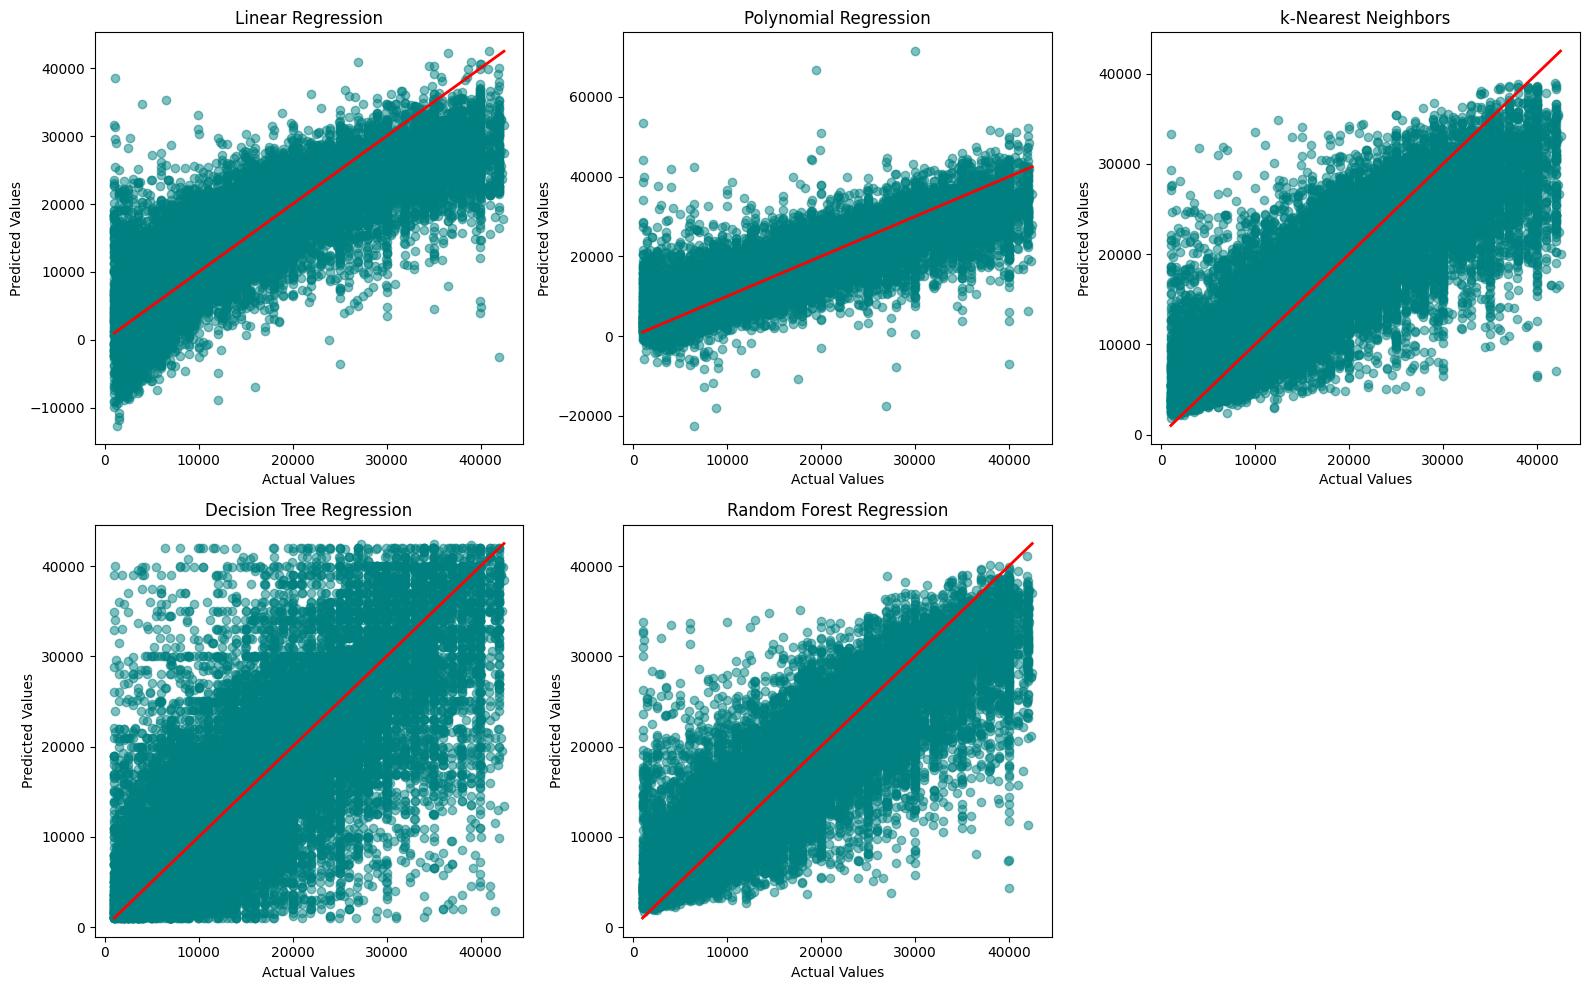

In [ ]:
plt.figure(figsize=(16, 10))

# Helper function to plot
def plot_actual_vs_predicted(y_true, y_pred, title, position):
    plt.subplot(2, 3, position)
    plt.scatter(y_true, y_pred, alpha=0.5, color='teal')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', lw=2)  # Perfect predictions line
    plt.title(title)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

# Plot each model
plot_actual_vs_predicted(y_test, y_pred_lr, "Linear Regression", 1)
plot_actual_vs_predicted(y_test, y_pred_poly, "Polynomial Regression", 2)
plot_actual_vs_predicted(y_test, y_pred_knn, "k-Nearest Neighbors", 3)
plot_actual_vs_predicted(y_test, y_pred_dt, "Decision Tree Regression", 4)
plot_actual_vs_predicted(y_test, y_pred_rf, "Random Forest Regression", 5)

plt.tight_layout()
plt.show()

In [ ]:
all_models

,Linear Regression,Polynomial Regression,KNeighbors Regression,Decision Tree Regression,Random Forest Regression
R2 Score,7.070712e-01,7.759490e-01,7.568865e-01,5.845950e-01,7.914790e-01
Mean Absolute Error,3.796831e+03,3.071319e+03,3.266478e+03,4.119832e+03,2.948516e+03
Mean Squared Error,2.649826e+07,2.026759e+07,2.199198e+07,3.757742e+07,1.886275e+07
RMSE,5.147646e+03,4.501954e+03,4.689561e+03,6.130043e+03,4.343127e+03


Final Model Using Random Forest Regression on all training and testing values

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
X_train.shape

(139609, 129)

In [ ]:
rf = RandomForestRegressor(n_estimators=150,random_state=0, min_samples_leaf=1, max_features=0.3, n_jobs=-1, oob_score=True)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

evaluate_model(y_test, y_pred_rf)

mse:  16056877.380154023
rmse:  4007.1033652944398
mae:  2659.345111047764
r-squared:  0.8224969543521506


[0.8224969543521506, 2659.345111047764, 16056877.380154023, 4007.1033652944398]

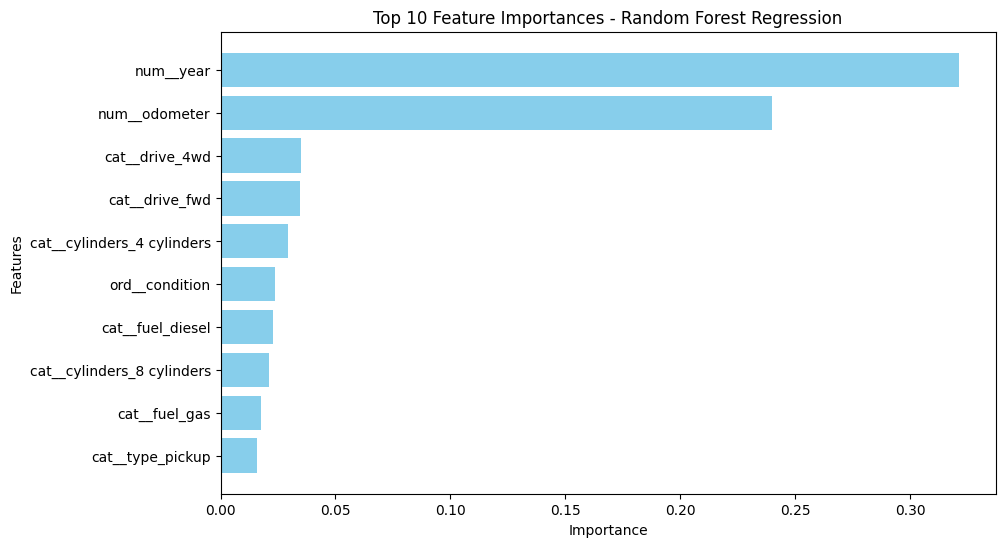

In [ ]:
feature_names = preprocessor.get_feature_names_out()
importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# sort features
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

top_10_features = feature_importances_df.head(10)  # Get the first 10 rows

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance on top
plt.title('Top 10 Feature Importances - Random Forest Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()